In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    5) top parameter i use it to specify indexes i want to see it
    """
    if x_axis:
        order = data[x_axis].value_counts().iloc[:top].index

    else :
        order = data[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

def pie_plot(column_name, explodeIndex = None):
    """
    1) input : column name, column data type must be object or categorical
    2) explodeIndex, is the index i need to explode it
    2) output : circle chart that shows size of each unique values and percentage
    """
    explodeList = [0] * data[column_name].nunique()

    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1

    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

In [3]:
data = pd.read_excel("Coffee Shop Sales.xlsx")

In [6]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [7]:
unique_counts = data.nunique()
print(unique_counts)

transaction_id      149116
transaction_date       181
transaction_time     25762
transaction_qty          6
store_id                 3
store_location           3
product_id              80
unit_price              41
product_category         9
product_type            29
product_detail          80
dtype: int64


In [11]:
unique_cats = data['product_category'].unique()
print(unique_cats)

['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


In [12]:
valid_categories = ['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery']
data = data[data['product_category'].isin(valid_categories)]

In [13]:
unique_cats = data['product_category'].unique()
print(unique_cats)

['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery']


In [15]:
unique_types = data['product_type'].unique()
print(unique_types)

['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee']


In [16]:
data.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

<ipython-input-16-beddc0ea7016>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)


In [17]:
data["year"] = data["transaction_date"].dt.year
data["month"] = data["transaction_date"].dt.month_name()
data["day"] = data["transaction_date"].dt.day_name()

<ipython-input-17-ba6b6c84018e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year"] = data["transaction_date"].dt.year
<ipython-input-17-ba6b6c84018e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month"] = data["transaction_date"].dt.month_name()
<ipython-input-17-ba6b6c84018e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [20]:
data.head()

,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day
0,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday
1,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
2,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday
3,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday
4,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday


In [19]:
data.drop(columns = ["transaction_date"], inplace = True)

<ipython-input-19-1eb84b0b1583>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ["transaction_date"], inplace = True)


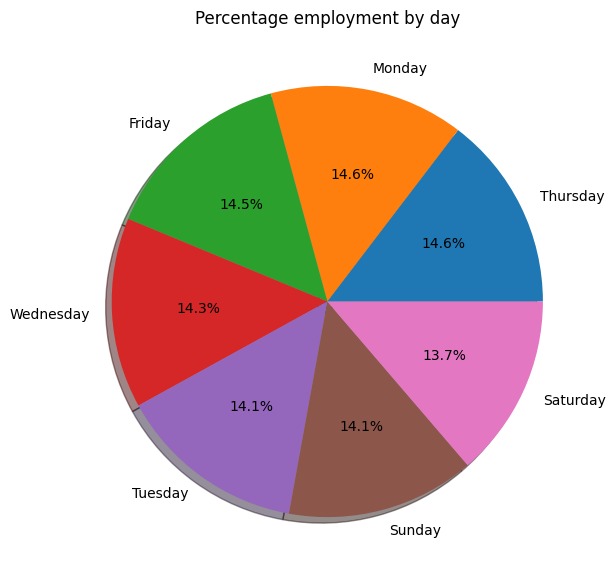

In [22]:
plt.figure(figsize = (10,7))
plt.title('Percentage employment by day')
pie_plot(column_name = "day")
plt.show()

<ipython-input-21-779ed745a1e3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


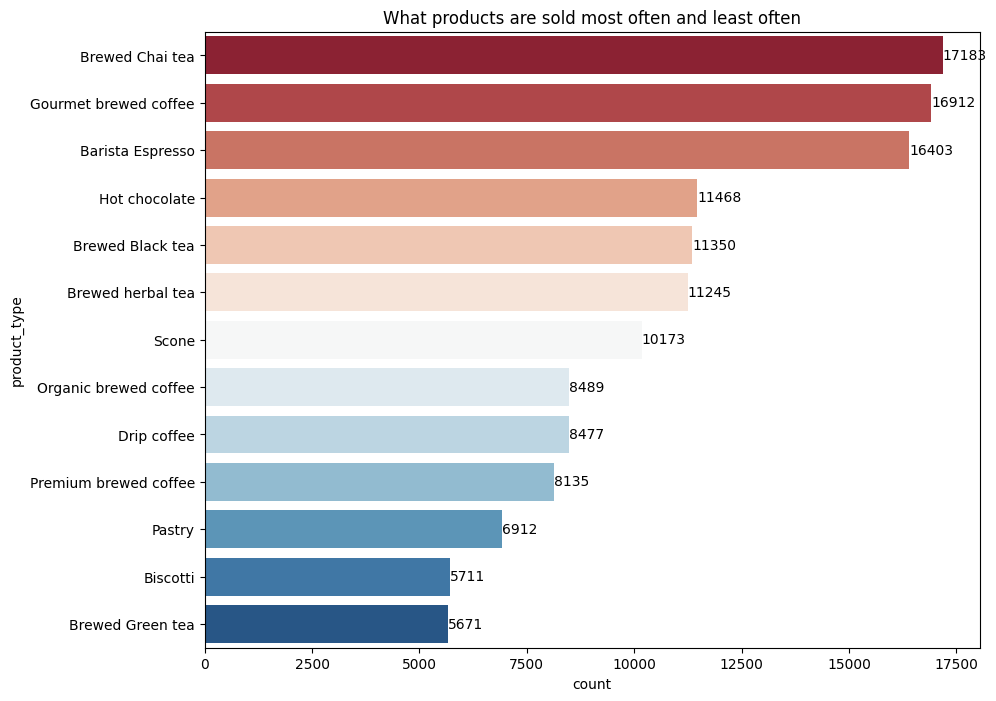

In [24]:
plt.figure(figsize = (10,8))
plt.title('What products are sold most often and least often')
count_plot(y_axis = "product_type")
plt.show()

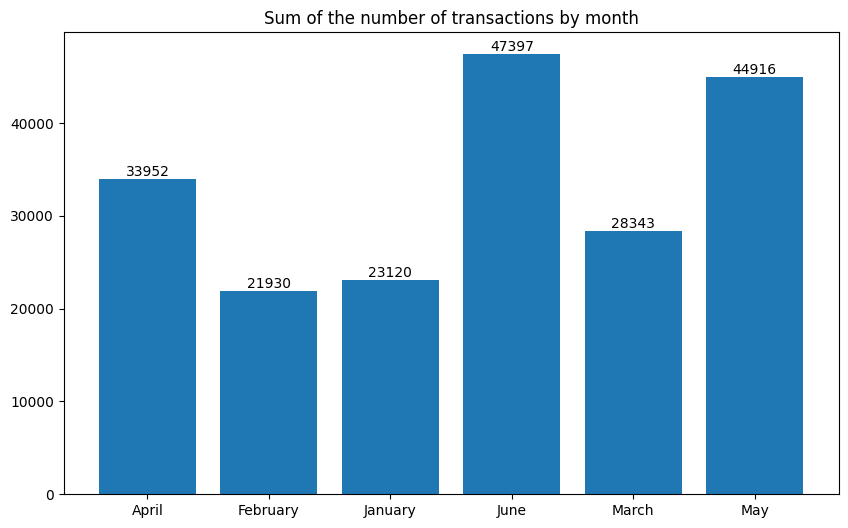

In [25]:
transactions_by_day = data.groupby('month')['transaction_qty'].sum()
plt.figure(figsize=(10, 6))
plt.bar(transactions_by_day.index, transactions_by_day.values)
plt.title('Sum of the number of transactions by month')
for i, value in enumerate(transactions_by_day.values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', color='black', size=10)

plt.show()

<ipython-input-21-779ed745a1e3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


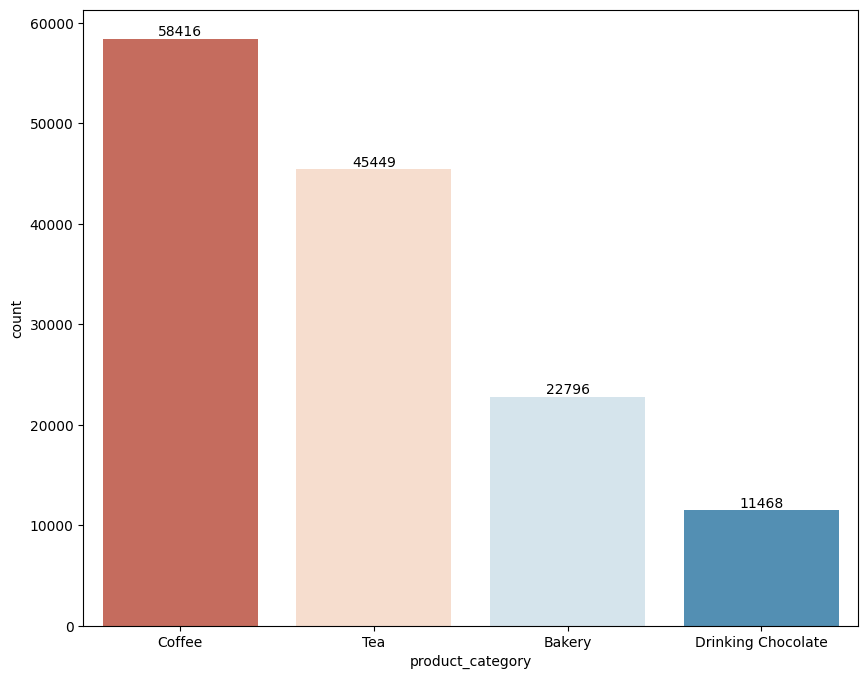

In [28]:
plt.figure(figsize = (10,8))

# call function i create it in cell 12
count_plot(x_axis = "product_category")

In [ ]:
plt.figure(figsize = (10,8))

# call function i create it in cell 12
count_plot(x_axis = "product_category")

In [32]:
feature_data = {
    'product_type': ['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate', 'Drip coffee',
                     'Scone', 'Barista Espresso', 'Brewed Black tea', 'Brewed Green tea',
                     'Brewed herbal tea', 'Biscotti', 'Pastry', 'Organic brewed coffee',
                     'Premium brewed coffee'],
    'acidity': [5, 3, 1, 3, 0, 4, 3, 3, 2, 0, 0, 4, 4],
    'bitterness': [4, 2, 1, 4, 0, 5, 3, 3, 1, 0, 0, 4, 4],
    'sweetness': [1, 2, 5, 1, 3, 1, 1, 1, 1, 3, 4, 1, 1],
    'caffeine_content': ['High', 'Medium', 'None', 'High', 'None', 'High', 'Medium', 'Medium', 'None', 'None', 'None', 'High', 'High']
}
feature_df = pd.DataFrame(feature_data)

In [33]:
feature_df.head()

,product_type,acidity,bitterness,sweetness,caffeine_content
0,Gourmet brewed coffee,5,4,1,High
1,Brewed Chai tea,3,2,2,Medium
2,Hot chocolate,1,1,5,None
3,Drip coffee,3,4,1,High
4,Scone,0,0,3,None


In [37]:
data = data.merge(feature_df, on='product_type', how='left')

In [35]:
merged_df

,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,acidity,bitterness,sweetness,caffeine_content
0,07:06:11,2,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday,5,4,1,High
1,07:08:56,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,3,2,2,Medium
2,07:14:04,2,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday,1,1,5,None
3,07:20:24,1,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday,3,4,1,High
4,07:22:41,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,3,2,2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138124,20:16:31,2,Lower Manhattan,2.50,Tea,Brewed herbal tea,Lemon Grass Rg,2023,June,Friday,2,1,1,None
138125,20:18:41,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023,June,Friday,2,1,1,None
138126,20:25:10,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023,June,Friday,3,3,1,Medium
138127,20:31:34,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023,June,Friday,2,1,1,None


<ipython-input-21-779ed745a1e3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


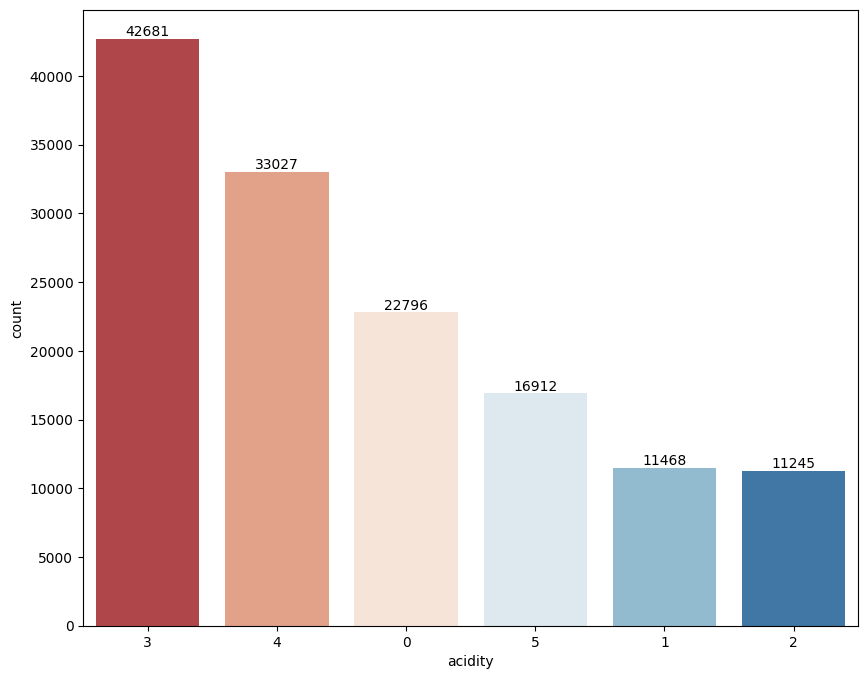

In [38]:
plt.figure(figsize = (10,8))


count_plot(x_axis = "acidity")

<ipython-input-21-779ed745a1e3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


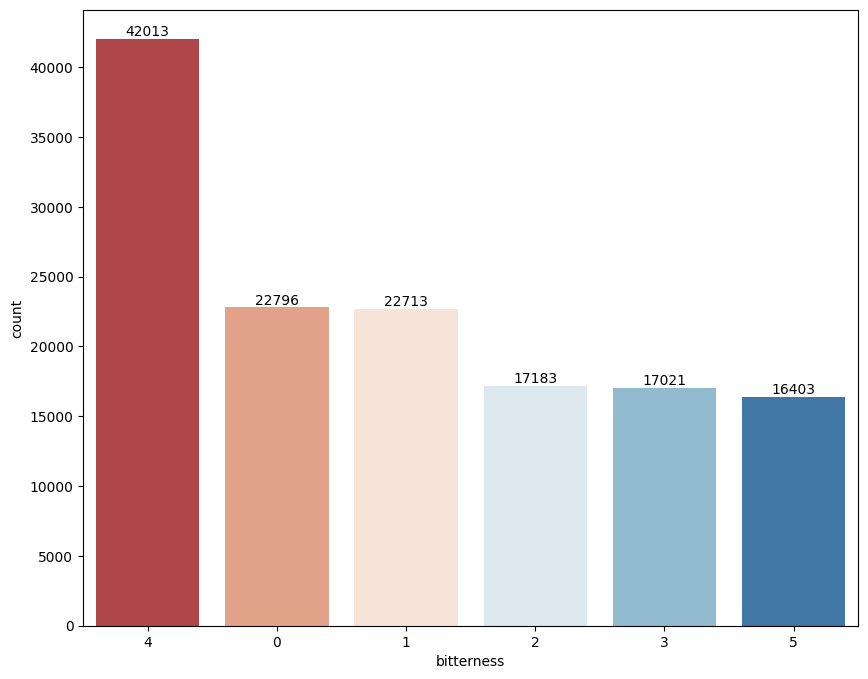

In [39]:
plt.figure(figsize = (10,8))


count_plot(x_axis = "bitterness")

<ipython-input-21-779ed745a1e3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


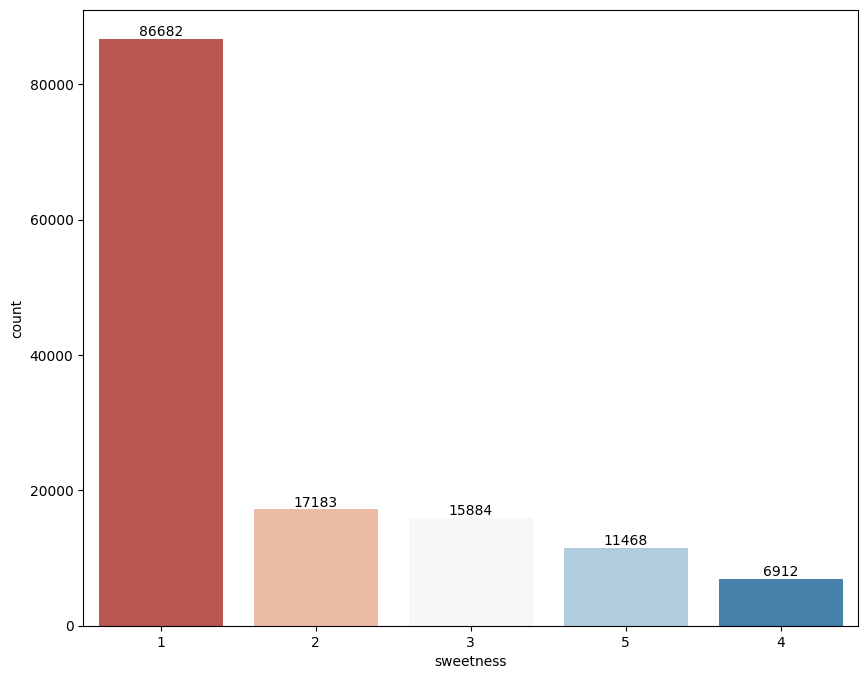

In [40]:

plt.figure(figsize = (10,8))


count_plot(x_axis = "sweetness")